In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pymc.sampling_jax
import xarray as xr
import pingouin as pg
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
data = bmb.load_data("sleepstudy")
data.head()

Reaction  Days  Subject
0  249.5600     0      308
1  258.7047     1      308
2  250.8006     2      308
3  321.4398     3      308
4  356.8519     4      308

In [4]:
data = data[data['Days'].isin([0, 1]) == False]
data.head()

Reaction  Days  Subject
2  250.8006     2      308
3  321.4398     3      308
4  356.8519     4      308
5  414.6901     5      308
6  382.2038     6      308

In [5]:
def plot_data(data):
    fig, axes = plt.subplots(3, 6, figsize=(16, 8), sharey=True, sharex=True, dpi=300, constrained_layout=True)
    fig.subplots_adjust(left=0.075, right=0.975, bottom=0.075, top=0.925, wspace=0.03)

    axes_flat = axes.ravel()

    for i, subject in enumerate(data["Subject"].unique()):
        ax = axes_flat[i]
        idx = data.index[data["Subject"] == subject].tolist()
        days = data.loc[idx, "Days"].values
        reaction = data.loc[idx, "Reaction"].values

        # Plot observed data points
        ax.scatter(days, reaction, color="C0", ec="black", alpha=0.7)

        # Add a title
        ax.set_title(f"Subject: {subject}", fontsize=14)

    # Remove axis labels for individual plots
    for ax in axes_flat:
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Set x-axis ticks for the last row
    for ax in axes[-1]:
        ax.xaxis.set_ticks([0, 2, 4, 6, 8])

    return axes

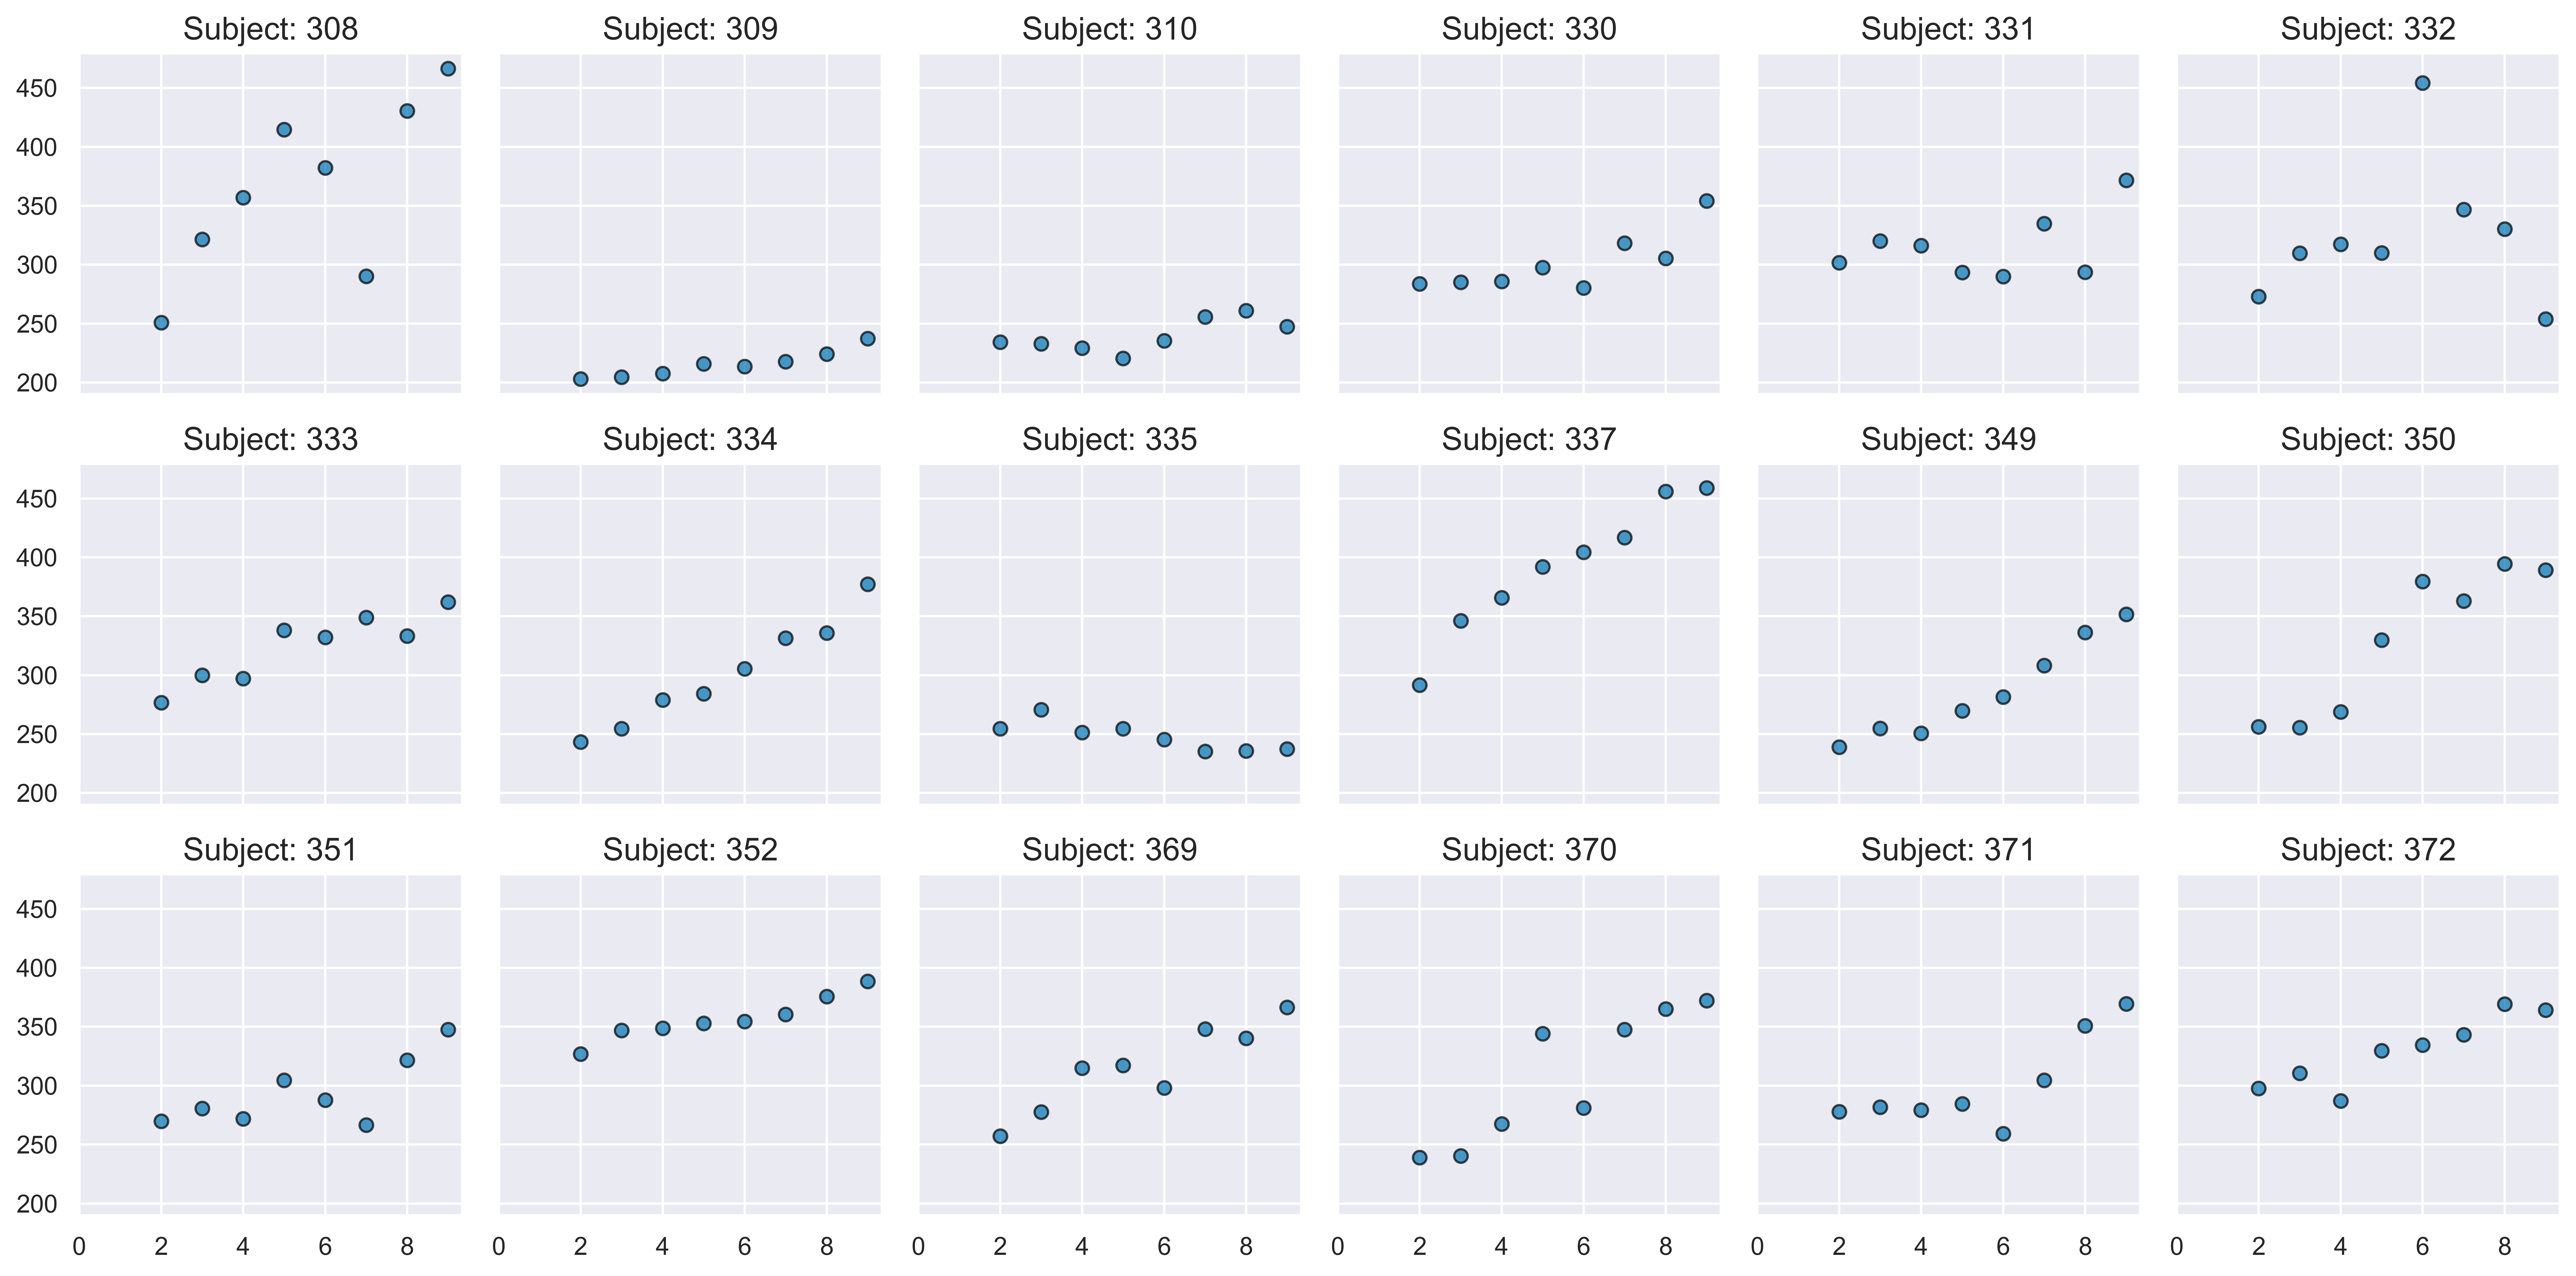

In [6]:
plot_data(data)
plt.tight_layout();

In [7]:
model_pooling = bmb.Model("Reaction ~ 1 + Days", data)

In [8]:
results_pooling = model_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)

Compiling...


Compilation time = 0:00:01.824714


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1520.69it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1521.89it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1523.61it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1525.14it/s]


Sampling time = 0:00:01.549178


Transforming variables...


Transformation time = 0:00:00.071196


Computing Log Likelihood...


Log Likelihood time = 0:00:00.122128


In [9]:
az.summary(results_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept       245.11  11.00  224.54   265.67       0.18     0.13   3853.47   
Days             11.44   1.85    8.05    14.96       0.03     0.02   3770.54   
Reaction_sigma   51.15   3.13   45.41    57.08       0.05     0.04   3820.86   

                ess_tail  r_hat  
Intercept        2715.46    1.0  
Days             2826.56    1.0  
Reaction_sigma   2758.15    1.0

In [10]:
model_no_pooling = bmb.Model("Reaction ~ Days * C(Subject)", data=data)
results_no_pooling = model_no_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)

Compiling...


Compilation time = 0:00:01.101493


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   5%|██▋                                                   | 100/2000 [00:01<00:04, 472.80it/s]

Running chain 2:   5%|██▋                                                   | 100/2000 [00:01<00:04, 460.59it/s]

Running chain 3:   5%|██▋                                                   | 100/2000 [00:01<00:04, 459.82it/s]

Running chain 1:   5%|██▋                                                   | 100/2000 [00:01<00:04, 457.62it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 4564.46it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 4191.13it/s]

Running chain 3:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 4187.78it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 4505.32it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 972.09it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 972.55it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 973.11it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 973.64it/s]

Sampling time = 0:00:02.166878


Transforming variables...


Transformation time = 0:00:00.087116


Computing Log Likelihood...


Log Likelihood time = 0:00:00.121277


In [11]:
az.summary(results_no_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept             247.52  23.40  206.77   294.20       1.24     0.88   
Days                   21.23   3.92   13.43    28.12       0.21     0.15   
C(Subject)[309]       -56.27  32.83 -116.63     5.76       1.31     0.92   
C(Subject)[310]       -29.70  34.12  -96.19    32.01       1.36     0.96   
C(Subject)[330]         9.22  33.13  -52.30    71.69       1.36     0.96   
C(Subject)[331]        41.09  33.25  -19.42   105.11       1.32     0.94   
C(Subject)[332]        63.52  32.71    3.62   125.66       1.35     0.96   
C(Subject)[333]        15.99  34.27  -50.10    79.45       1.36     0.97   
C(Subject)[334]       -46.02  33.51 -110.55    14.33       1.36     0.96   
C(Subject)[335]        23.89  33.61  -40.83    85.50       1.35     0.96   
C(Subject)[337]        20.48  33.03  -43.06    80.41       1.27     0.90   
C(Subject)[349]       -51.27  33.17 -113.94     9.11       1.37     0.97   
C(Subject)[350]       -45.50  33.73 -108.84    17.84       1.36     0.96   
C(Subject)[351]         0.28  33.01  -60.53    63.80       1.28     0.91   
C(Subject)[352]        69.23  33.46    5.25   130.83       1.36     0.96   
C(Subject)[369]        -8.50  33.02  -70.23    52.97       1.34     0.95   
C(Subject)[370]       -53.93  33.24 -120.99     3.92       1.34     0.95   
C(Subject)[371]       -14.53  33.25  -76.70    48.15       1.31     0.93   
C(Subject)[372]        21.19  33.25  -44.48    80.59       1.32     0.94   
Days:C(Subject)[309]  -16.83   5.47  -26.99    -6.58       0.22     0.16   
Days:C(Subject)[310]  -17.31   5.69  -28.75    -7.03       0.23     0.16   
Days:C(Subject)[330]  -13.15   5.59  -23.65    -2.65       0.23     0.16   
Days:C(Subject)[331]  -16.35   5.60  -26.34    -5.28       0.22     0.16   
Days:C(Subject)[332]  -18.83   5.50  -28.86    -8.35       0.23     0.16   
Days:C(Subject)[333]  -10.30   5.71  -20.98     0.59       0.23     0.16   
Days:C(Subject)[334]   -3.09   5.62  -13.48     7.47       0.23     0.16   
Days:C(Subject)[335]  -25.48   5.59  -36.66   -15.79       0.23     0.16   
Days:C(Subject)[337]    1.20   5.56   -8.99    11.82       0.22     0.15   
Days:C(Subject)[349]   -4.84   5.58  -14.92     5.86       0.23     0.16   
Days:C(Subject)[350]    1.98   5.65   -8.86    12.67       0.23     0.16   
Days:C(Subject)[351]  -12.87   5.53  -23.16    -2.54       0.22     0.15   
Days:C(Subject)[352]  -13.94   5.61  -24.53    -3.42       0.23     0.16   
Days:C(Subject)[369]   -7.41   5.56  -17.82     2.95       0.23     0.16   
Days:C(Subject)[370]   -0.59   5.61  -10.89    10.19       0.23     0.16   
Days:C(Subject)[371]   -8.88   5.60  -18.87     2.06       0.22     0.15   
Days:C(Subject)[372]  -10.13   5.60  -20.64     0.26       0.22     0.16   
Reaction_sigma         25.82   1.78   22.51    29.06       0.03     0.02   

                      ess_bulk  ess_tail  r_hat  
Intercept               357.07    697.87   1.01  
Days                    348.07    667.65   1.01  
C(Subject)[309]         632.83   1387.88   1.00  
C(Subject)[310]         629.88   1217.24   1.00  
C(Subject)[330]         598.42   1205.28   1.00  
C(Subject)[331]         628.03   1578.46   1.00  
C(Subject)[332]         587.64   1297.81   1.00  
C(Subject)[333]         630.68   1374.19   1.00  
C(Subject)[334]         608.07   1294.96   1.00  
C(Subject)[335]         617.20   1487.47   1.00  
C(Subject)[337]         673.44   1503.86   1.00  
C(Subject)[349]         589.41   1322.77   1.01  
C(Subject)[350]         613.16   1470.48   1.00  
C(Subject)[351]         664.20   1469.12   1.00  
C(Subject)[352]         603.65   1211.03   1.00  
C(Subject)[369]         610.54   1226.62   1.01  
C(Subject)[370]         613.17   1257.51   1.00  
C(Subject)[371]         646.43   1312.10   1.00  
C(Subject)[372]         631.81   1315.68   1.00  
Days:C(Subject)[309]    600.55   1211.39   1.00  
Days:C(Subject)[310]    599.03   1345.99   1.00  
Days:C(Subject)[330]    601.13   12

In [12]:
246.98 + -55.29

191.69

In [13]:
21.30 + -16.97

4.330000000000002

In [14]:
data_subject_309 = data[data["Subject"] == 309]
data_subject_309.shape

(8, 3)

In [15]:
result = pg.linear_regression(data_subject_309["Days"], data_subject_309["Reaction"])
print(result)

       names        coef        se          T          pval        r2  \
0  Intercept  191.576970  3.723259  51.454104  3.615788e-09  0.890144   
1       Days    4.357144  0.624898   6.972569  4.325982e-04  0.890144   

     adj_r2    CI[2.5%]   CI[97.5%]  
0  0.871834  182.466483  200.687457  
1  0.871834    2.828074    5.886214  


In [16]:
model_partial_pooling = bmb.Model(
    "Reaction ~ 1 + Days + (Days | Subject)", data, categorical="Subject"
)

In [17]:
results_partial_pooling = model_partial_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)

Compiling...


Compilation time = 0:00:01.221171


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6930.69it/s]

Running chain 0:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6764.26it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7677.90it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7599.00it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 8867.96it/s]

Running chain 0:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 8341.56it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:02<00:00, 9212.56it/s]

Running chain 2:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:02<00:00, 9189.01it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 935.33it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 935.69it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 936.19it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 936.68it/s]


Sampling time = 0:00:02.273829


Transforming variables...


Transformation time = 0:00:00.112382


Computing Log Likelihood...


Log Likelihood time = 0:00:00.160879


In [18]:
az.summary(results_partial_pooling, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept           245.17   9.44  227.57   263.61       0.18     0.13   
Days                 11.45   1.89    7.99    15.05       0.05     0.04   
Reaction_sigma       26.06   1.83   22.87    29.62       0.03     0.02   
1|Subject_sigma      31.26   9.00   15.98    48.95       0.22     0.16   
Days|Subject_sigma    6.90   1.63    3.99     9.88       0.04     0.03   
1|Subject[308]        9.90  18.91  -24.15    46.89       0.28     0.29   
1|Subject[309]      -42.22  20.28  -79.59    -3.82       0.34     0.24   
1|Subject[310]      -25.82  18.99  -61.93     9.06       0.30     0.24   
1|Subject[330]        4.45  18.37  -30.65    38.56       0.27     0.27   
1|Subject[331]       21.94  18.82  -13.40    56.39       0.31     0.24   
1|Subject[332]       34.47  19.61   -3.31    70.38       0.33     0.24   
1|Subject[333]       11.33  18.25  -22.84    44.12       0.28     0.23   
1|Subject[334]      -21.72  18.89  -56.35    14.43       0.31     0.23   
1|Subject[335]        1.51  19.01  -34.55    37.24       0.29     0.28   
1|Subject[337]       25.77  19.43   -9.52    63.45       0.30     0.24   
1|Subject[349]      -27.51  19.27  -64.51     6.38       0.32     0.25   
1|Subject[350]      -16.90  18.83  -53.82    18.09       0.31     0.25   
1|Subject[351]       -1.78  18.27  -36.07    33.20       0.28     0.26   
1|Subject[352]       42.83  20.09    5.53    79.99       0.35     0.26   
1|Subject[369]       -1.78  18.35  -35.57    33.28       0.28     0.27   
1|Subject[370]      -25.08  18.82  -59.79    10.80       0.32     0.23   
1|Subject[371]       -6.91  18.18  -39.80    28.72       0.27     0.25   
1|Subject[372]       15.42  18.63  -21.18    49.04       0.28     0.24   
Days|Subject[308]     8.18   3.48    1.32    14.41       0.07     0.05   
Days|Subject[309]    -8.35   3.57  -15.38    -1.98       0.07     0.05   
Days|Subject[310]    -7.34   3.38  -13.63    -0.99       0.06     0.05   
Days|Subject[330]    -2.16   3.25   -8.05     4.09       0.06     0.04   
Days|Subject[331]    -3.12   3.38   -9.84     2.93       0.07     0.05   
Days|Subject[332]    -3.96   3.45  -10.36     2.45       0.07     0.05   
Days|Subject[333]     0.51   3.29   -5.59     6.67       0.06     0.05   
Days|Subject[334]     3.13   3.26   -2.86     9.32       0.06     0.04   
Days|Subject[335]   -11.23   3.49  -18.00    -4.95       0.07     0.05   
Days|Subject[337]     9.96   3.52    3.65    16.83       0.07     0.05   
Days|Subject[349]     1.56   3.42   -4.77     8.06       0.07     0.05   
Days|Subject[350]     7.32   3.37    1.30    13.91       0.06     0.04   
Days|Subject[351]    -2.28   3.30   -8.25     4.09       0.07     0.05   
Days|Subject[352]     0.24   3.51   -6.39     6.78       0.07     0.05   
Days|Subject[369]     1.62   3.25   -4.61     7.58       0.06     0.05   
Days|Subject[370]     4.84   3.36   -1.16    11.36       0.07     0.05   
Days|Subject[371]     0.11   3.27   -6.08     6.26       0.06     0.05   
Days|Subject[372]     0.82   3.32   -5.06     7.34       0.07     0.05   

                    ess_bulk  ess_tail  r_hat  
Intercept            2840.73   3189.63    1.0  
Days                 1285.93   2125.60    1.0  
Reaction_sigma       3807.99   3190.76    1.0  
1|Subject_sigma      1680.91   1928.70    1.0  
Days|Subject_sigma   1790.85   2402.24    1.0  
1|Subject[308]       4533.99   2900.83    1.0  
1|Subject[309]       3594.20   2344.23    1.0  
1|Subject[310]       4094.68   3051.75    1.0  
1|Subject[330]       4717.10   3118.44    1.0  
1|Subject[331]       3596.22   3026.48    1.0  
1|Subject[332]       3421.66   2781.82    1.0  
1|Subject[333]       4293.54   3109.88    1.0  
1|Subject[334]       3628.30   3308.04    1.0  
1|Subject[335]       4277.63   3389.89    1.0  
1|Subject[337]       4198.70   3170.88    1.0  
1|Subject[349]       3615.59   2969.33    1.0  
1|Subject[350]       3822.78   2851.38    1.0  
1|Subject[351]       4167.83   3098.61    1.0  
1

In [19]:
245.25 + -43.14

202.11

In [20]:
11.33 + -8.14

3.1899999999999995

In [21]:
az.summary(results_partial_pooling, var_names=["Intercept", "Days"], round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  245.17  9.44  227.57   263.61       0.18     0.13   2840.73   
Days        11.45  1.89    7.99    15.05       0.05     0.04   1285.93   

           ess_tail  r_hat  
Intercept   3189.63    1.0  
Days        2125.60    1.0

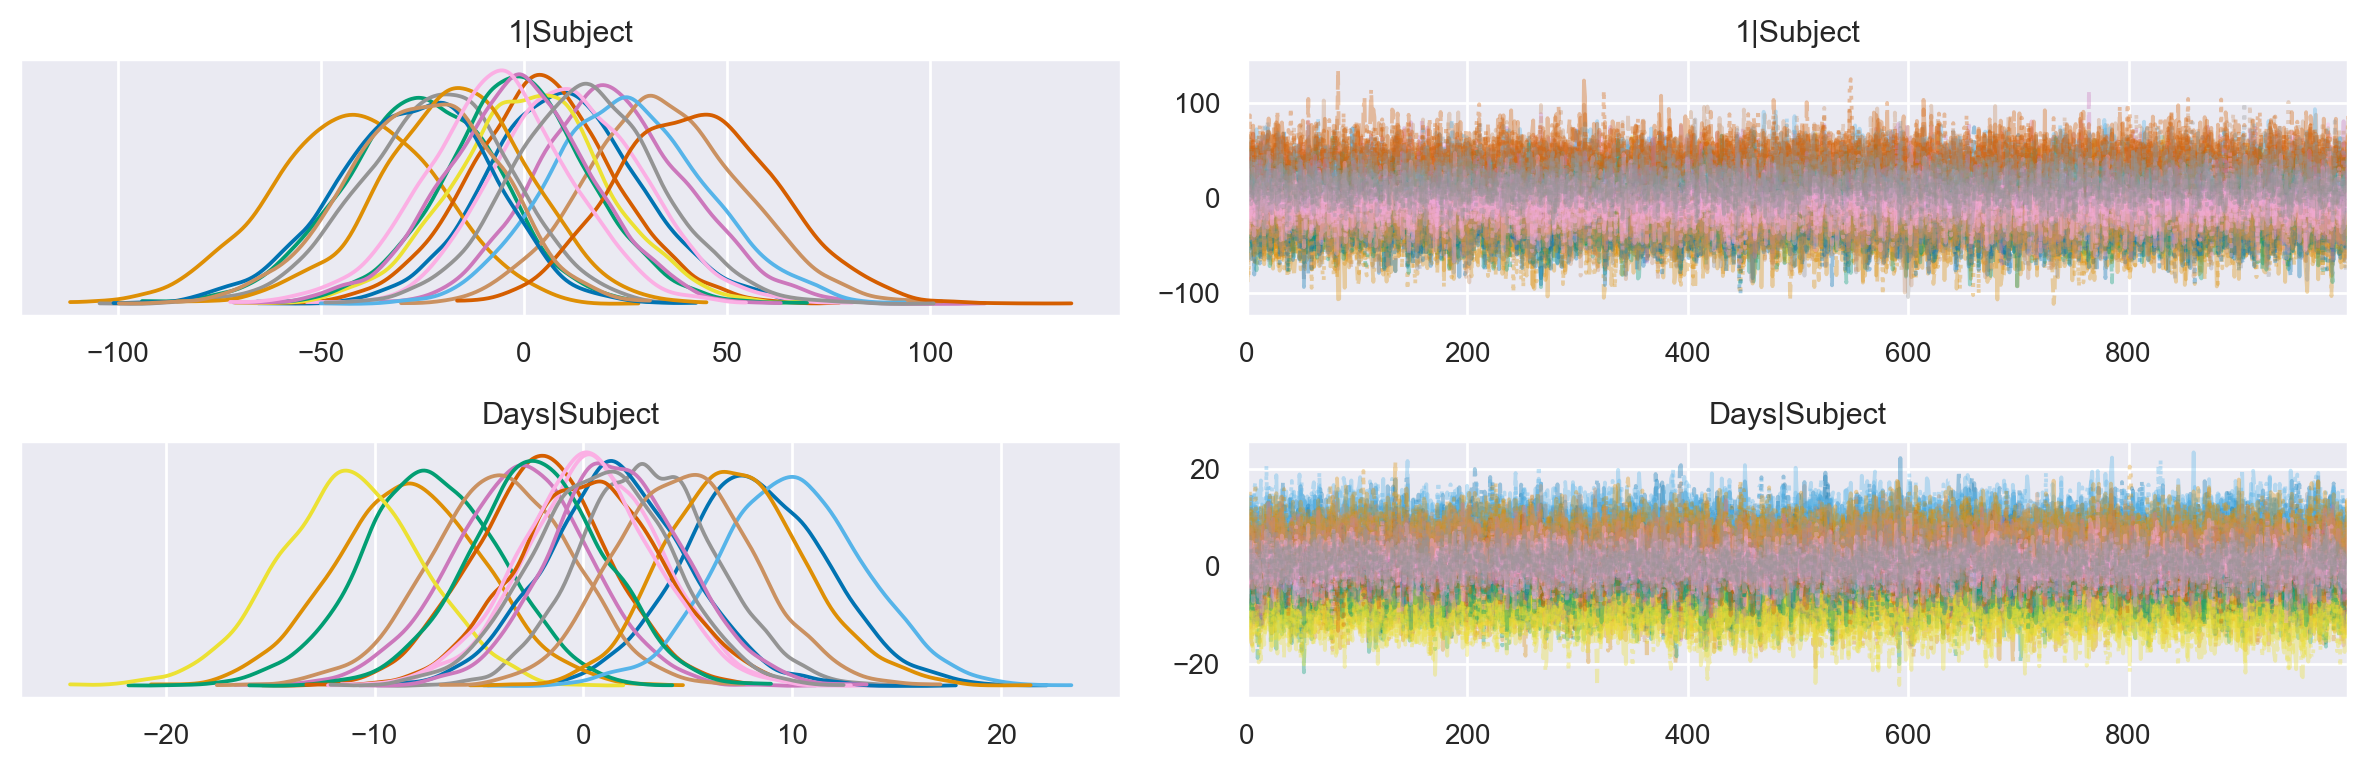

In [22]:
az.plot_trace(
    results_partial_pooling, combined=True, var_names=["1|Subject", "Days|Subject"]
)
plt.tight_layout()

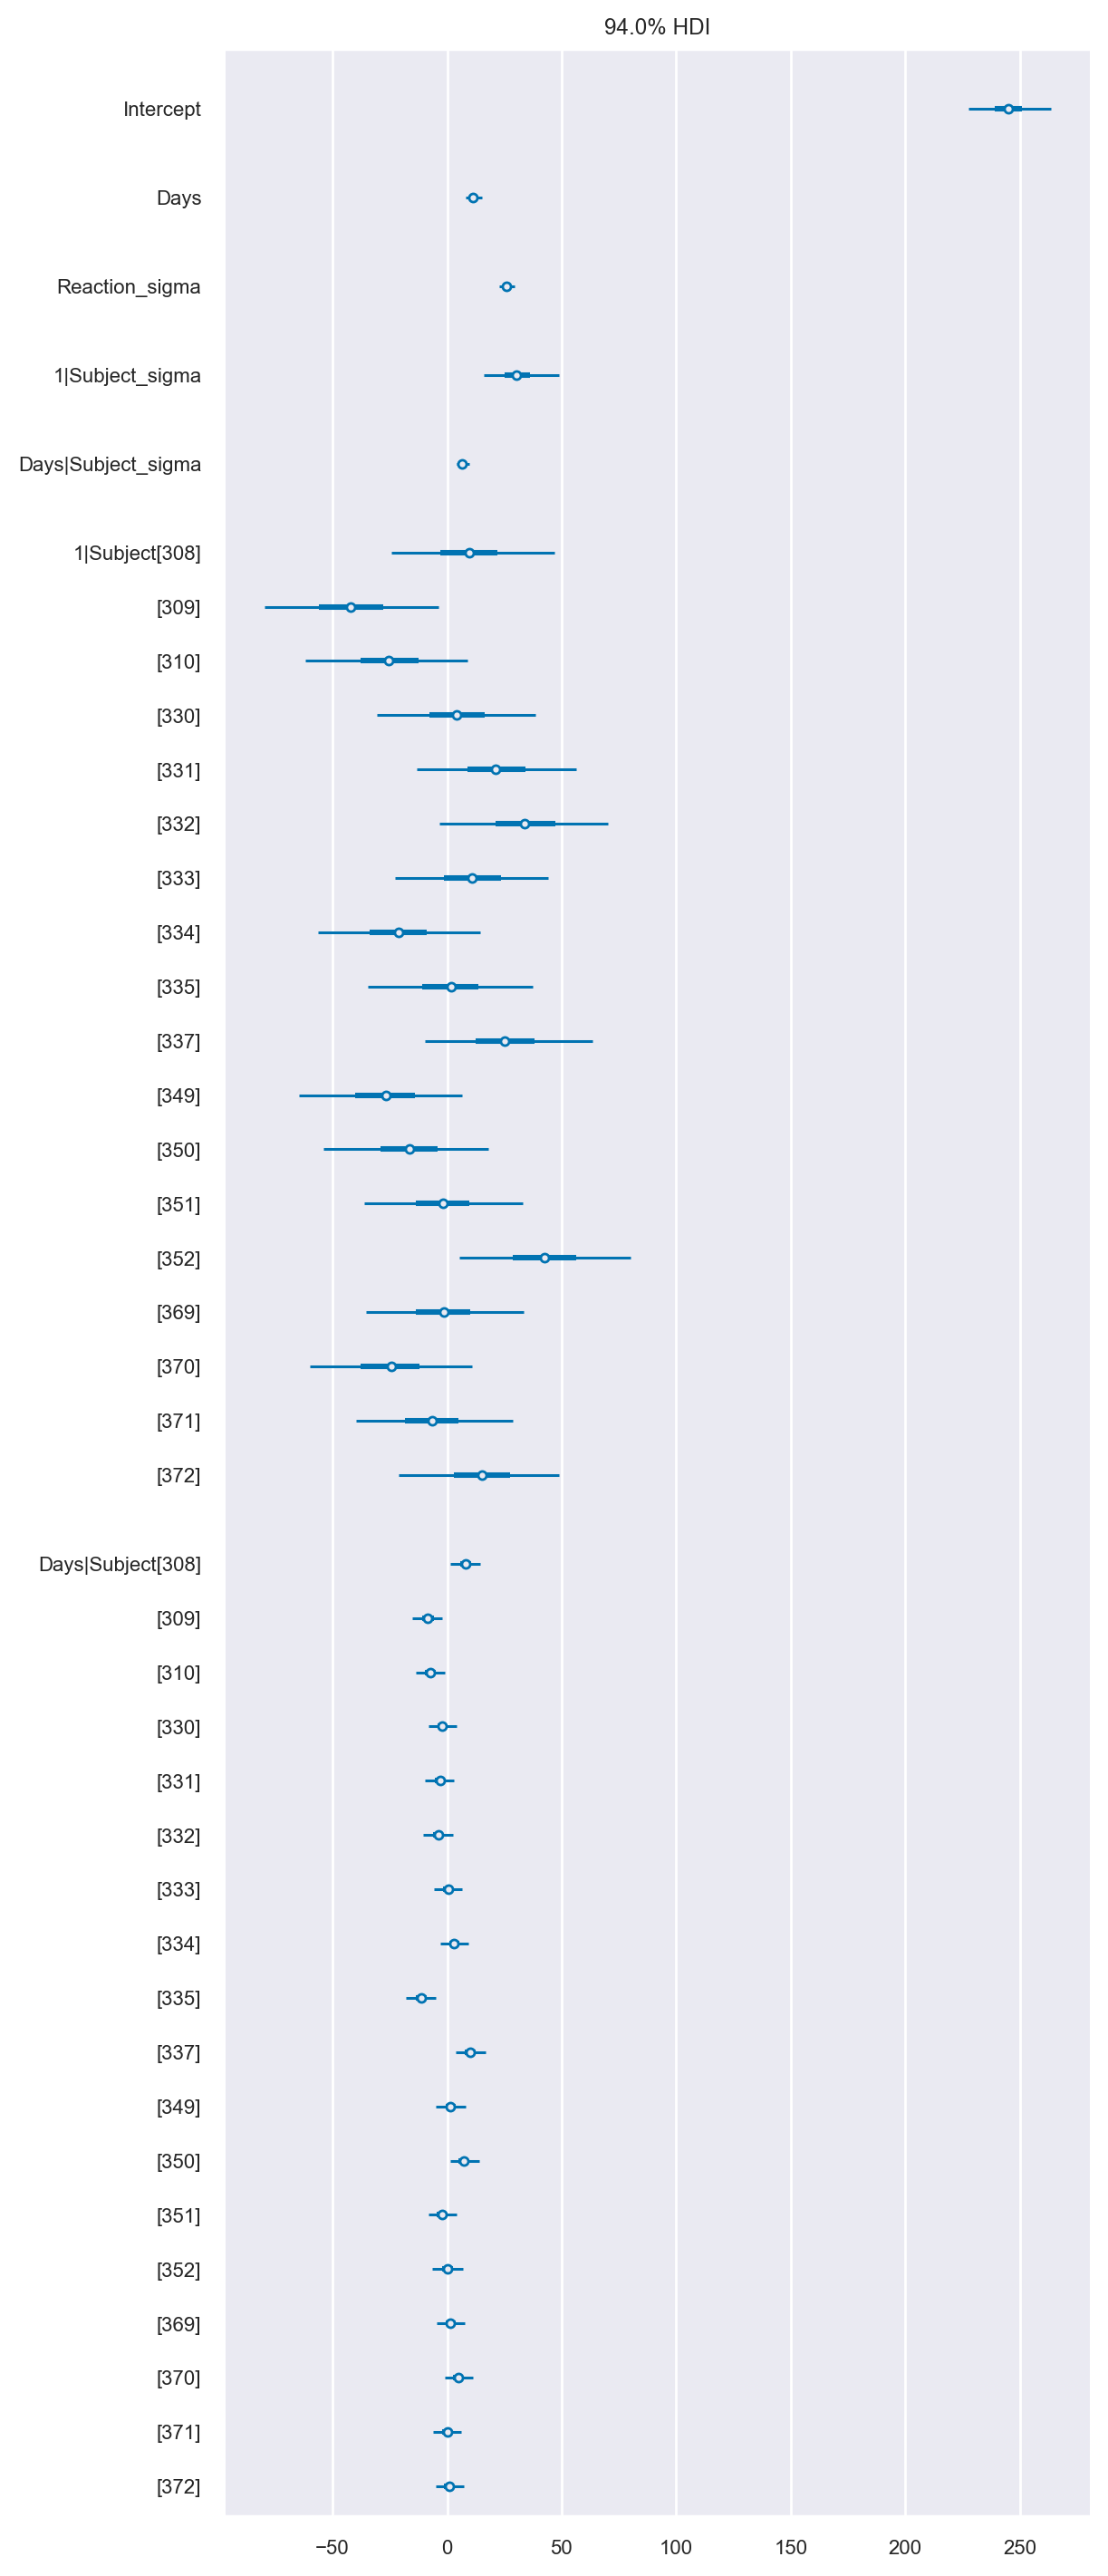

In [23]:
az.plot_forest(data=results_partial_pooling, r_hat=False, combined=True, textsize=8);

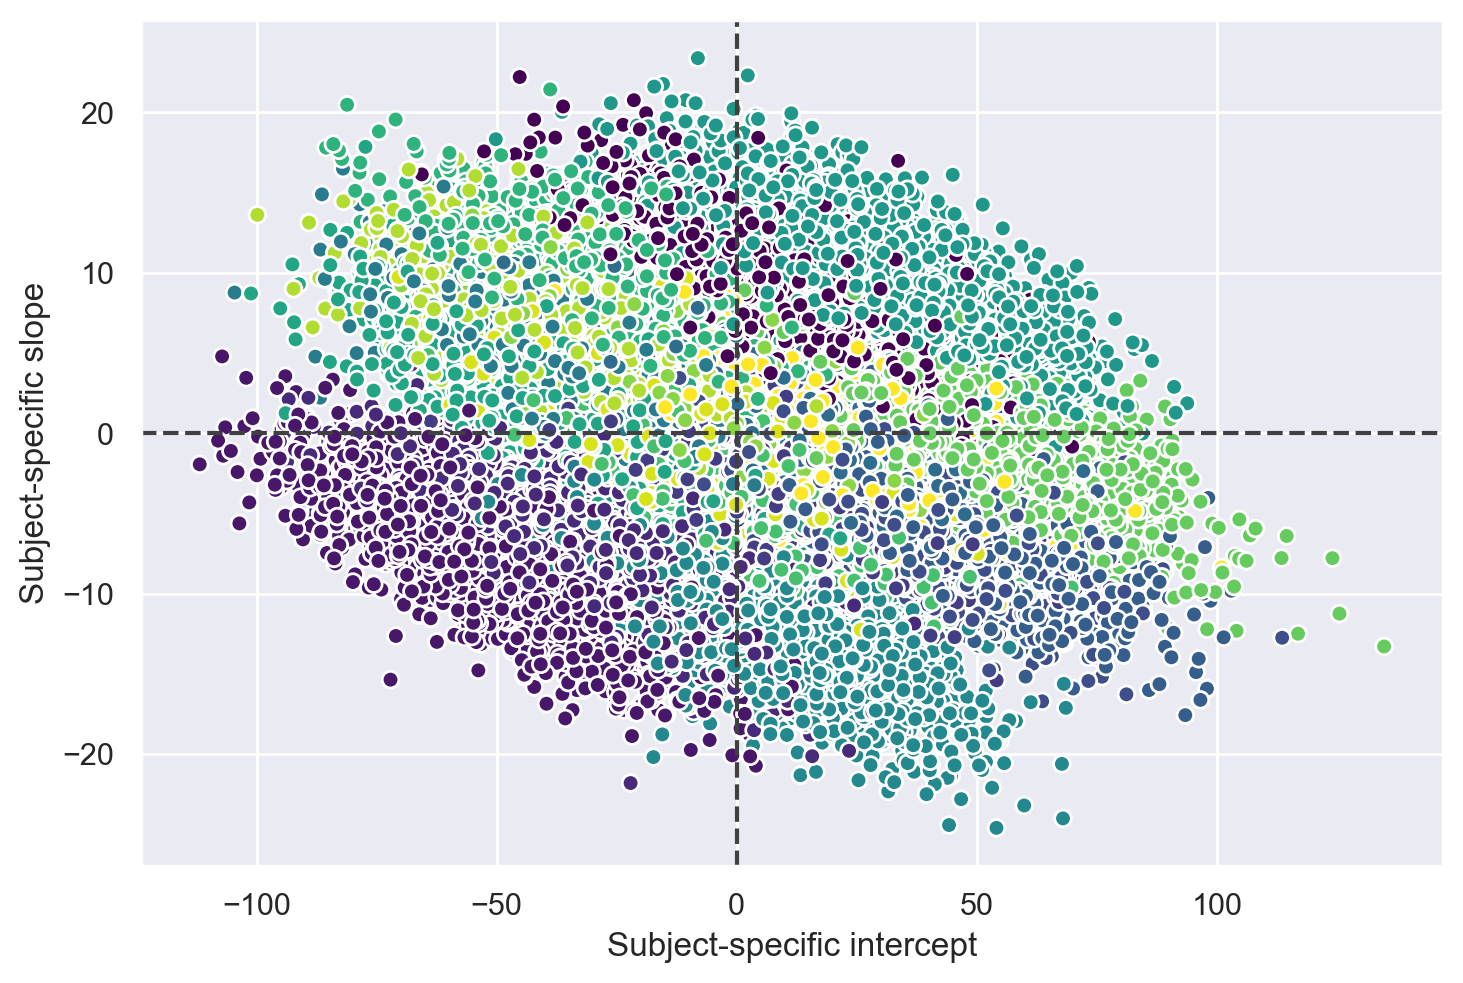

In [24]:
#  extract a subsample from the posterior and stack the chain and draw dims
posterior = az.extract(results_partial_pooling, num_samples=500)

_, ax = plt.subplots()

results_partial_pooling.posterior.plot.scatter(
    x="1|Subject", y="Days|Subject",
    hue="Subject__factor_dim",
    add_colorbar=False,
    add_legend=False,
    cmap="viridis",
    edgecolors=None,
)

ax.axhline(c="0.25", ls="--")
ax.axvline(c="0.25", ls="--")
ax.set_xlabel("Subject-specific intercept")
ax.set_ylabel("Subject-specific slope");

In [25]:
models_dict = {
    "pooling": results_pooling,
    "no_pooling": results_no_pooling,
    "partial_pooling": results_partial_pooling
}
df_compare = az.compare(models_dict)
df_compare

rank    elpd_loo      p_loo  elpd_diff    weight         se  \
partial_pooling     0 -692.881256  31.445044   0.000000  0.916444  22.129953   
no_pooling          1 -695.542160  37.107338   2.660904  0.033817  22.249620   
pooling             2 -772.187991   3.066511  79.306734  0.049739   9.028219   

                       dse  warning scale  
partial_pooling   0.000000     True   log  
no_pooling        3.198088     True   log  
pooling          20.648207    False   log

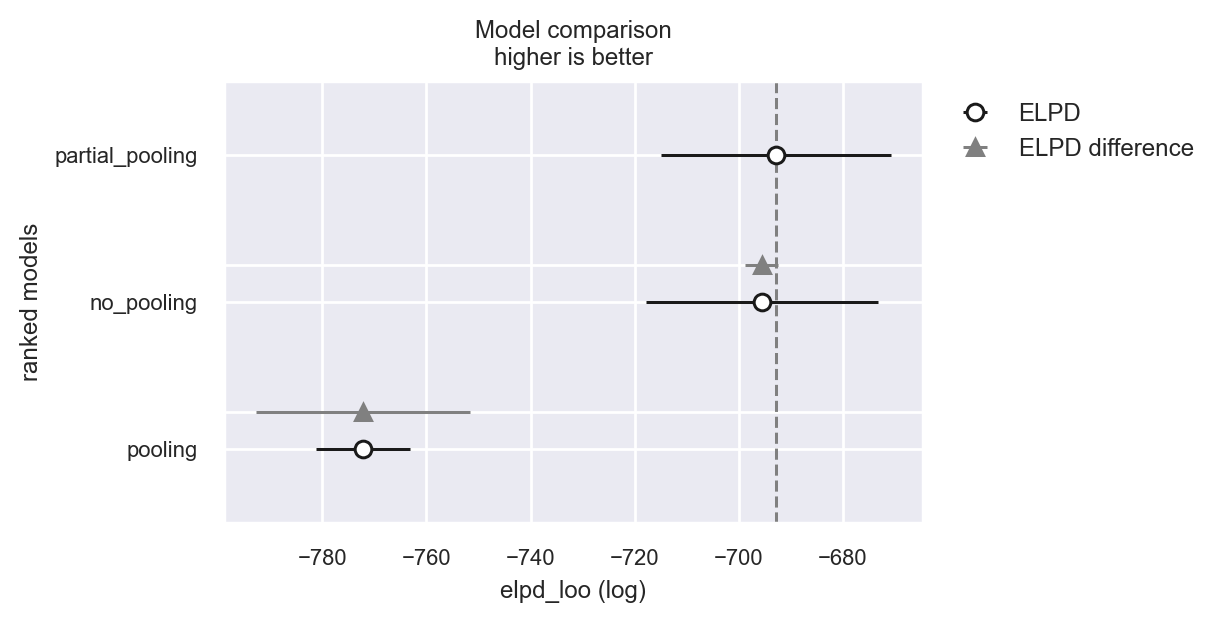

In [26]:
az.plot_compare(df_compare, insample_dev=False);

In [27]:
model_pooling_fitted = model_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)
model_pooling.predict(model_pooling_fitted, kind="pps")

Compiling...


Compilation time = 0:00:00.547984


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1612.80it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1614.01it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1615.67it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1617.22it/s]


Sampling time = 0:00:01.310641


Transforming variables...


Transformation time = 0:00:00.041635


Computing Log Likelihood...


Log Likelihood time = 0:00:00.088847


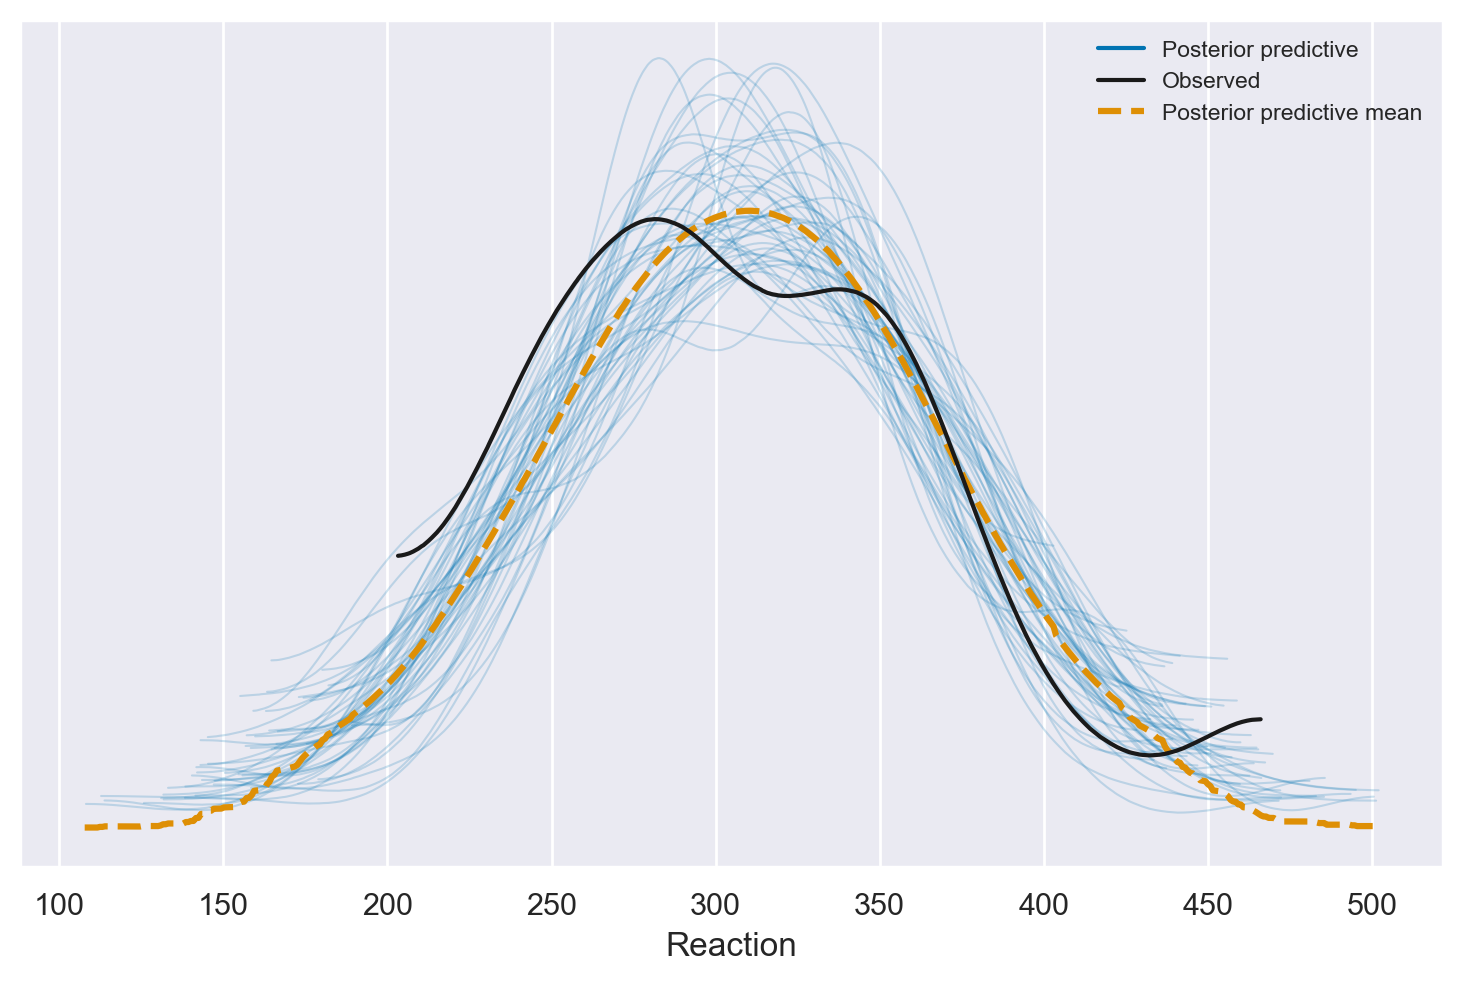

In [28]:
az.plot_ppc(model_pooling_fitted, num_pp_samples=50);

In [29]:
model_no_pooling_fitted = model_no_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)
model_no_pooling.predict(model_no_pooling_fitted, kind="pps");

Compiling...


Compilation time = 0:00:00.884552


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   5%|██▋                                                   | 100/2000 [00:01<00:04, 401.12it/s]

Running chain 1:   5%|██▋                                                   | 100/2000 [00:01<00:04, 384.90it/s]

Running chain 3:   5%|██▋                                                   | 100/2000 [00:01<00:04, 381.57it/s]

Running chain 0:   5%|██▋                                                   | 100/2000 [00:01<00:04, 380.70it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 3895.06it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 3778.95it/s]

Running chain 0:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 3765.68it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 4011.26it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 967.47it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 967.94it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 968.53it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 969.07it/s]

Sampling time = 0:00:02.153644


Transforming variables...


Transformation time = 0:00:00.059853


Computing Log Likelihood...


Log Likelihood time = 0:00:00.115778


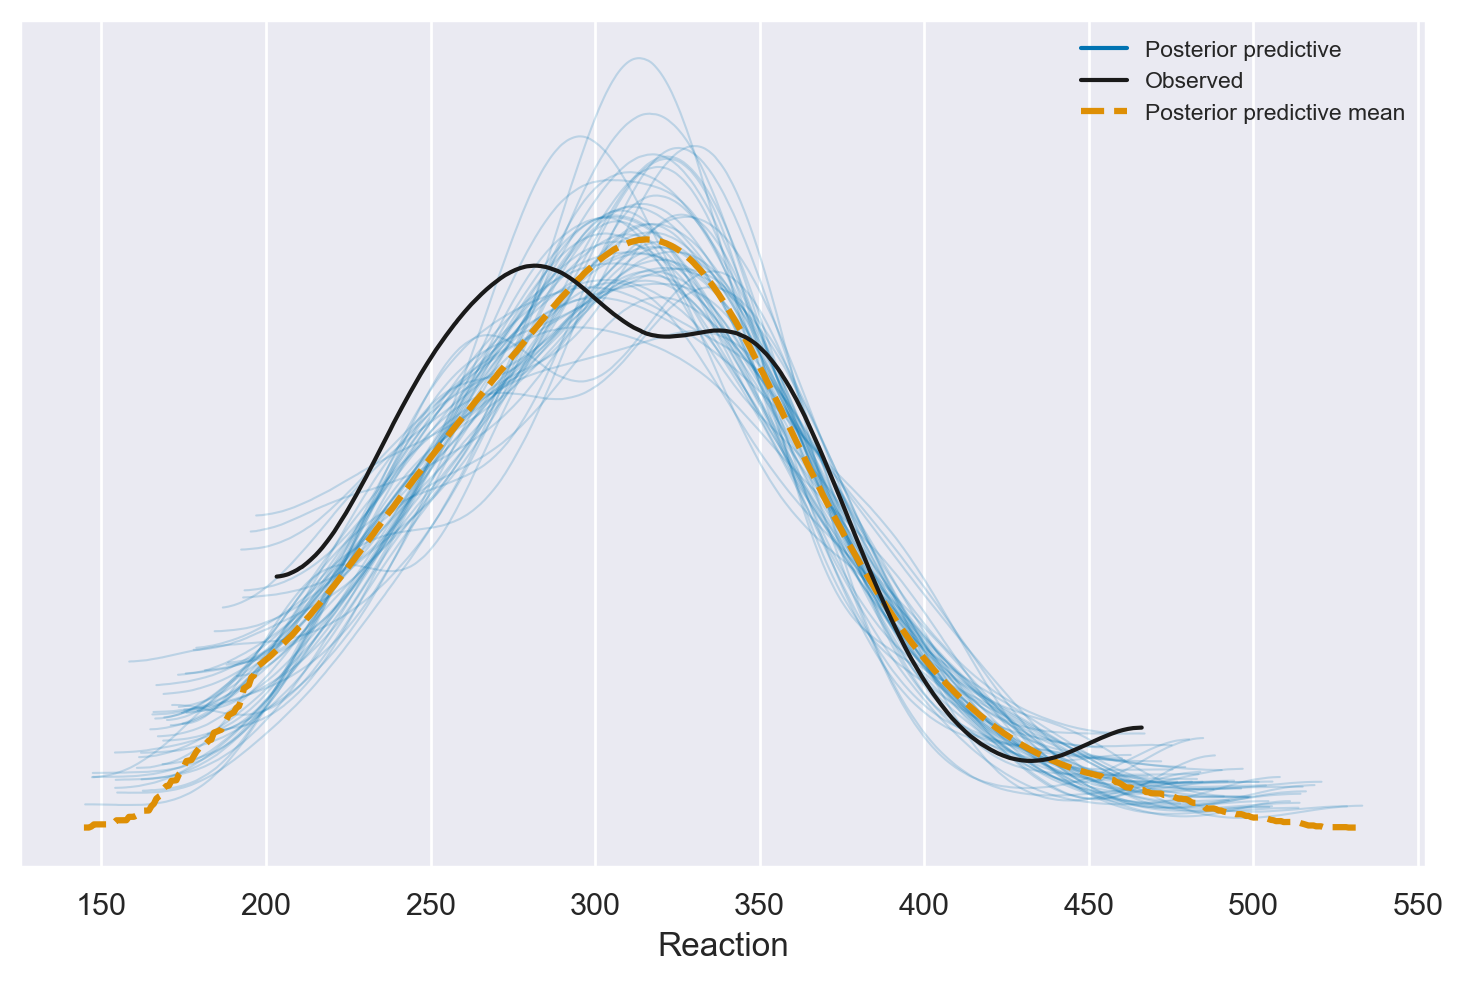

In [30]:
az.plot_ppc(model_no_pooling_fitted, num_pp_samples=50);

In [31]:
model_partial_pooling_fitted = model_partial_pooling.fit(
    method="nuts_numpyro", idata_kwargs={"log_likelihood": True}
)
model_partial_pooling.predict(model_partial_pooling_fitted, kind="pps");

Compiling...


Compilation time = 0:00:01.092668


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7905.06it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7720.58it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7654.31it/s]

Running chain 2:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6519.76it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 8970.89it/s]

Running chain 3:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:02<00:00, 9393.16it/s]

Running chain 0:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:02<00:00, 9166.55it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 8265.61it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 959.56it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 959.94it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 960.46it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 961.07it/s]


Sampling time = 0:00:02.195666


Transforming variables...


Transformation time = 0:00:00.083852


Computing Log Likelihood...


Log Likelihood time = 0:00:00.150618


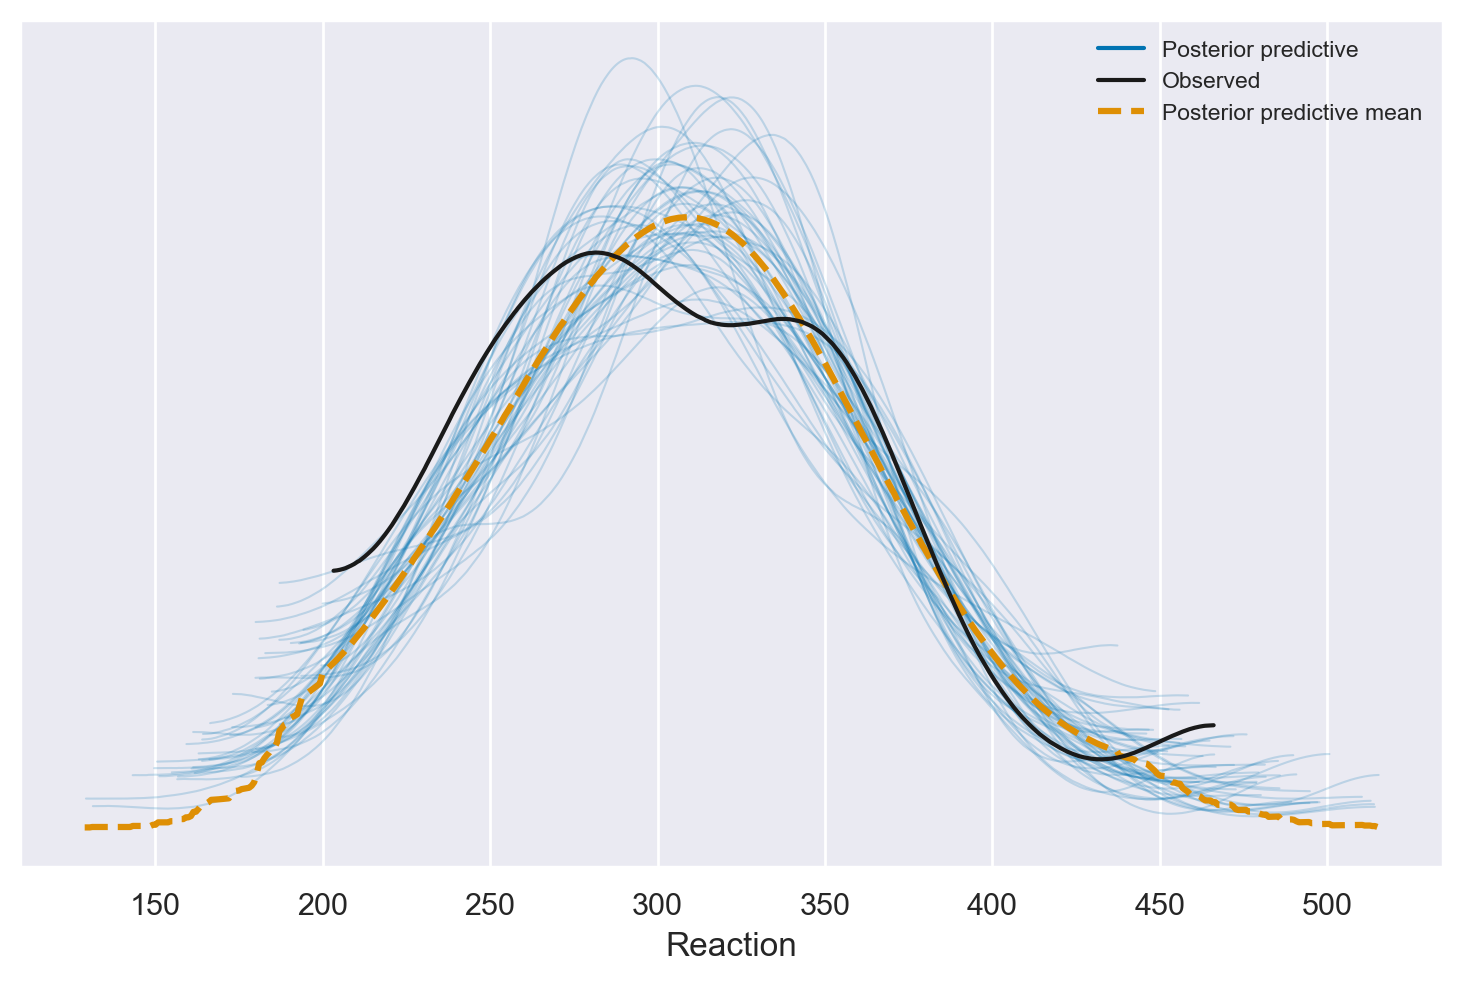

In [32]:
az.plot_ppc(model_partial_pooling_fitted, num_pp_samples=50);

In [33]:
%run ../wm.py

Watermark:
----------
Last updated: 2024-01-26T19:04:21.659096+01:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit


